In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as  plt
%matplotlib inline

In [2]:
df_train_features=pd.read_csv(r'training_set_features.csv')
df_train_labels=pd.read_csv(r'training_set_labels.csv')

In [3]:
df_train_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
df_train_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [5]:
#merging labels with features
df_train_features['h1n1_vaccine']=df_train_labels.h1n1_vaccine
df_train_features['seasonal_vaccine']=df_train_labels.seasonal_vaccine

In [6]:
#dropping the id column as it will contribute in the prediction
df_train_features.drop('respondent_id',axis=1,inplace=True)

In [7]:
df_train_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


##### EDA

In [8]:
df_train_features.shape

(26707, 37)

In [9]:
df_train_features.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [45]:
df_train_features.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [46]:
df_train_features.income_poverty.value_counts()

0    12777
1     6810
3     4423
2     2697
Name: income_poverty, dtype: int64

In [47]:
df_train_features.doctor_recc_h1n1.value_counts()

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

In [49]:
df_train_features.opinion_seas_risk.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64

In [10]:
df_train_features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [11]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [12]:
df_train_features.dtypes['age_group']

dtype('O')

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
object_features=[]
for i in df_train_features.columns:
    if (df_train_features.dtypes[i])=='object':
#         print(i)
        object_features.append(i)

X = df_train_features.drop(object_features,axis=1)
X=X.fillna(0)
X=X.astype('int64')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [14]:
vif_data

,feature,VIF
0,h1n1_concern,5.854349
1,h1n1_knowledge,5.054582
2,behavioral_antiviral_meds,1.103944
3,behavioral_avoidance,4.434048
4,behavioral_face_mask,1.159787
5,behavioral_wash_hands,6.991242
6,behavioral_large_gatherings,2.482281
7,behavioral_outside_home,2.400230
8,behavioral_touch_face,3.980595
9,doctor_recc_h1n1,2.328278


C:\Users\Shubhayan\AppData\Local\Temp\ipykernel_8228\3106551160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df_train_features.corr())


<AxesSubplot: >

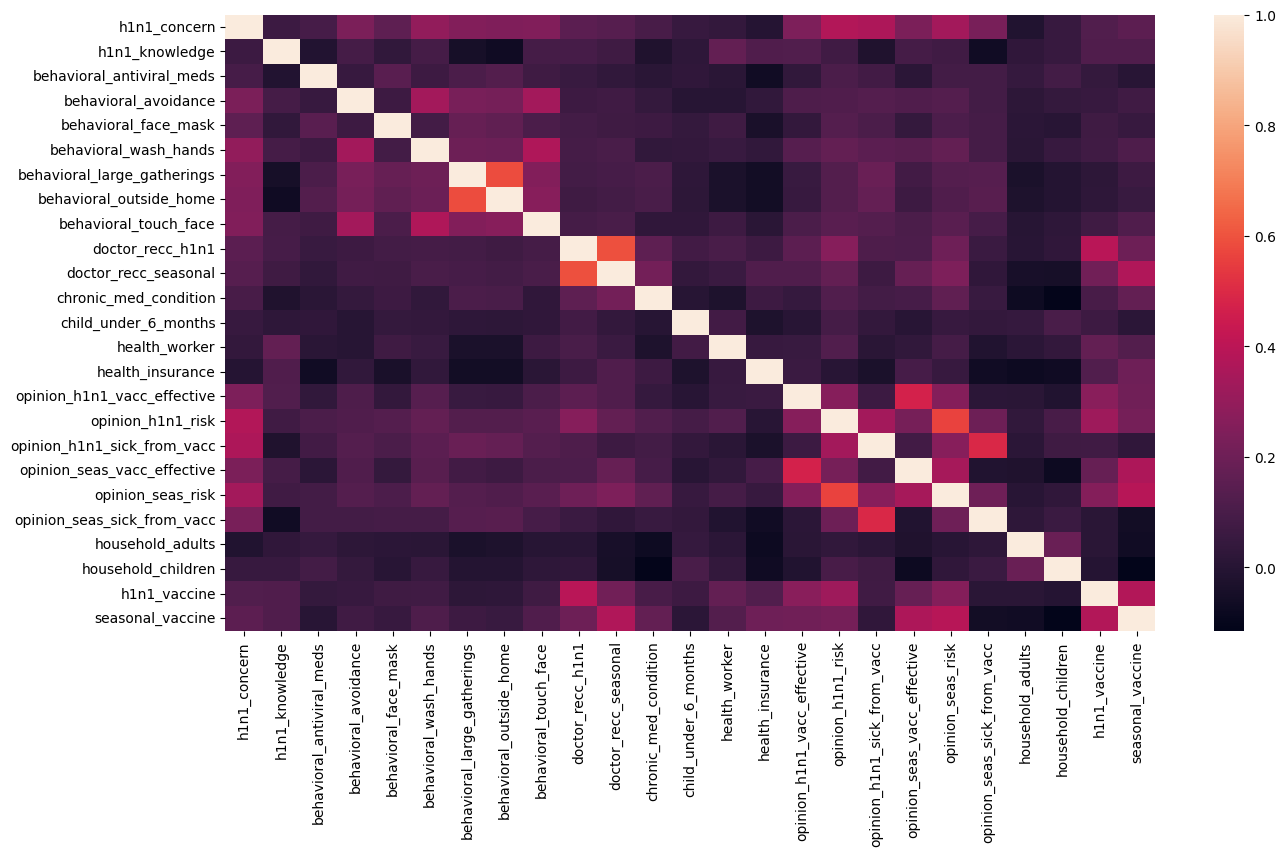

In [15]:
plt.figure(figsize=(15,8))
sn.heatmap(df_train_features.corr())

In [22]:
for i in object_features:
    plt.figure(figsize=(15,8))
    print(i ,' has ',df_train_features[i].unique(),'and counts are ',df_train_features[i].value_counts())
#     sn.countplot(x=df_train_features[i].value_counts())
#     plt.show()
#     pd.value_counts(df_train_features[i]).plot.bar()

age_group  has  ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years'] and counts are  65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64
education  has  ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan] and counts are  College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
race  has  ['White' 'Black' 'Other or Multiple' 'Hispanic'] and counts are  White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
sex  has  ['Female' 'Male'] and counts are  Female    15858
Male      10849
Name: sex, dtype: int64
income_poverty  has  ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan] and counts are  <= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: 

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

##### observations
    1) has many nan values in each column, 'employment_occupation','employment_occupation','health_insurance' have more than 50% nan
    2) don't have outliers
    3) 'opinion_h1n1_vacc_effective' and 'opinion_seas_vacc_effective' have multicollinearity
    4) some of the columns are objects
    

##### FEATURE ENGINEERING

In [18]:
#removing multicollinear columns
df_train_features.drop(['opinion_h1n1_vacc_effective','opinion_seas_vacc_effective'],axis=1,inplace=True)

In [19]:
df_train_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [39]:
#converting object columns using encoders
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
onhot=OneHotEncoder()
labelencod=LabelEncoder()
for i in object_features:
    if len(df_train_features[i].unique())>2:
        df_train_features[i]=labelencod.fit_transform(df_train_features[i])
    else:
        df_train_features[i]=pd.get_dummies(df_train_features[i],drop_first=True)

In [40]:
df_train_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,8,2,0.0,0.0,21,23,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,9,0,2.0,0.0,14,21,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,5,1,0.0,0.0,21,23,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,9,2,0.0,0.0,21,23,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,6,1,1.0,0.0,4,2,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,3,6,0,0.0,0.0,21,23,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,1,0,5,2,1.0,0.0,4,6,0,0


In [41]:
df_train_features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int32
education                        int32
race                             int32
sex                              uint8
income_poverty                   int32
marital_status                   int32
rent_or_own              

In [48]:
#dropping columns with more 50% nan
nan=['employment_occupation','employment_occupation','health_insurance']
df_train_features.drop(nan,axis=1,inplace=True)

In [69]:
#for columns with less that 1000 nan imputing them with the less occuring values to make the dataset balanced
for i in df_train_features.columns:
    if df_train_features[i].isnull().sum()<=1000:
        df_train_features.fillna(df_train_features[i].value_counts(ascending=True).idxmin(),inplace=True)

In [70]:
df_train_features.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment

In [155]:
#changing the dtypes to int
for i in df_train_features.columns:
    if df_train_features[i].dtype=='int64' or df_train_features[i].dtype=='uint8':
        df_train_features[i]=df_train_features[i].astype('float32')
        

In [156]:
df_train_features.dtypes

h1n1_concern                   float32
h1n1_knowledge                 float32
behavioral_antiviral_meds      float32
behavioral_avoidance           float32
behavioral_face_mask           float32
behavioral_wash_hands          float32
behavioral_large_gatherings    float32
behavioral_outside_home        float32
behavioral_touch_face          float32
doctor_recc_h1n1               float32
doctor_recc_seasonal           float32
chronic_med_condition          float32
child_under_6_months           float32
health_worker                  float32
opinion_h1n1_risk              float32
opinion_h1n1_sick_from_vacc    float32
opinion_seas_risk              float32
opinion_seas_sick_from_vacc    float32
age_group                      float32
education                      float32
race                           float32
sex                            float32
income_poverty                 float32
marital_status                 float32
rent_or_own                    float32
employment_status        

##### MODEL TRAINING 

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x=df_train_features.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)
y1=df_train_features.h1n1_vaccine
y2=df_train_features.seasonal_vaccine
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y1,test_size=.25,random_state=42)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y2,test_size=.25,random_state=42)

In [158]:
from sklearn.naive_bayes import GaussianNB
model11=GaussianNB()
model12=GaussianNB()
model11.fit(xtrain1,ytrain1)
model12.fit(xtrain2,ytrain2)

GaussianNB()

In [159]:
pred11=model11.predict(xtest1)
pred12=model12.predict(xtest2)

In [160]:
accuracy_score(ytest1,pred11)

0.7760970495731616

In [161]:
accuracy_score(ytest2,pred12)

0.7248764415156508

In [162]:
from sklearn.tree import DecisionTreeClassifier
model21=DecisionTreeClassifier()
model22=DecisionTreeClassifier()
model21.fit(xtrain1,ytrain1)
model22.fit(xtrain2,ytrain2)

DecisionTreeClassifier()

In [163]:
pred21=model21.predict(xtest1)
pred22=model22.predict(xtest2)

In [164]:
accuracy_score(ytest1,pred21)

0.7464430133293395

In [165]:
accuracy_score(ytest2,pred22)

0.6699116369627078

In [166]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain1,ytrain1)

RandomForestClassifier()

In [167]:
pred31=rf.predict(xtest1)
accuracy_score(ytest1,pred31)

0.8306125505466527

In [168]:
rf.fit(xtrain2,ytrain2)
pred32=rf.predict(xtest2)
accuracy_score(ytest2,pred32)

0.7642653886475962

In [169]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xtrain1,ytrain1)
xgb_model.fit(xtrain2,ytrain2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
pred41=xgb_model.predict(xtest1)
pred42=xgb_model.predict(xtest2)

In [171]:
accuracy_score(ytest1,pred41)

0.627677100494234

In [172]:
accuracy_score(ytest2,pred42)

0.7621686386101543

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten

In [174]:
ytrain1.shape

(20030,)

In [243]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtr=ss.fit_transform(xtrain1)
xts=ss.fit_transform(xtest1)
xtrainl=xtr.reshape(-1,1,xtr.shape[1])
xtestl=xts.reshape(-1,1,xts.shape[1])
ytrainl=ytrain1.values.reshape(-1,1,1)
ytestl=ytest1.values.reshape(-1,1,1)

In [244]:
xtrainl.shape

(20030, 1, 31)

In [249]:
model = Sequential()
model.add(LSTM(31, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='relu',return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(15, activation='relu',return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(xtrainl, ytrainl, epochs=30, verbose=1)

Epoch 1/30
626/626 [==============================] - 11s 11ms/step - loss: 0.1457
Epoch 2/30
626/626 [==============================] - 8s 13ms/step - loss: 0.1281
Epoch 3/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1255
Epoch 4/30
626/626 [==============================] - 7s 11ms/step - loss: 0.1239
Epoch 5/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1228
Epoch 6/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1223
Epoch 7/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1215
Epoch 8/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1210
Epoch 9/30
626/626 [==============================] - 7s 11ms/step - loss: 0.1205
Epoch 10/30
626/626 [==============================] - 7s 12ms/step - loss: 0.1194
Epoch 11/30
626/626 [==============================] - 13s 20ms/step - loss: 0.1180
Epoch 12/30
626/626 [==============================] - 15s 24ms/step - loss: 0.1180
Epoch 13/3

In [250]:
pred51=model.predict(xtestl)

209/209 [==============================] - 1s 3ms/step


In [251]:
pred51[2][0]

0.05838066

In [252]:
pl=[]
for i in range(len(pred51)):
    if pred51[i][0]<.5:
        pl.append(0)
    else:
        pl.append(1)

In [253]:
pl

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [254]:
yl=[ytestl[i][0] for i in range(len(ytestl))]

In [255]:
accuracy_score(yl,pl)

0.8103938894713194

In [260]:
xtr=ss.fit_transform(xtrain2)
xts=ss.fit_transform(xtest2)
xtrainl=xtr.reshape(-1,1,xtr.shape[1])
xtestl=xts.reshape(-1,1,xts.shape[1])
ytrainl=ytrain2.values.reshape(-1,1,1)
ytestl=ytest2.values.reshape(-1,1,1)
model.fit(xtrainl, ytrainl, epochs=50, verbose=1)

Epoch 1/50
626/626 [==============================] - 7s 12ms/step - loss: 0.1367
Epoch 2/50
626/626 [==============================] - 8s 13ms/step - loss: 0.1364
Epoch 3/50
626/626 [==============================] - 8s 13ms/step - loss: 0.1347
Epoch 4/50
626/626 [==============================] - 8s 13ms/step - loss: 0.1346
Epoch 5/50
626/626 [==============================] - 7s 11ms/step - loss: 0.1340
Epoch 6/50
626/626 [==============================] - 8s 13ms/step - loss: 0.1334
Epoch 7/50
626/626 [==============================] - 7s 12ms/step - loss: 0.1335
Epoch 8/50
626/626 [==============================] - 14s 22ms/step - loss: 0.1324
Epoch 9/50
626/626 [==============================] - 14s 23ms/step - loss: 0.1323
Epoch 10/50
626/626 [==============================] - 15s 24ms/step - loss: 0.1325
Epoch 11/50
626/626 [==============================] - 13s 21ms/step - loss: 0.1310
Epoch 12/50
626/626 [==============================] - 7s 12ms/step - loss: 0.1302
Epoch 13/

In [261]:
pred52=model.predict(xtestl)

209/209 [==============================] - 1s 3ms/step


In [262]:
pl=[]
for i in range(len(pred52)):
    if pred51[i][0]<.5:
        pl.append(0)
    else:
        pl.append(1)
yl=[ytestl[i][0] for i in range(len(ytestl))]
accuracy_score(yl,pl)

0.6336678148869253

In [265]:
#hyperparameter tune for random forest
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [267]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain1, ytrain1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [270]:
pred31=rf_random.predict(xtest1)
accuracy_score(ytest1,pred31)

0.8289651040886625

In [272]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier=xgb.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [273]:
random_search.fit(xtrain2,ytrain2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [277]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [279]:
xgbmodel=xgb.XGBClassifier(min_child_weight= 1,max_depth= 5,learning_rate= 0.25,gamma= 0.1,colsample_bytree= 0.3)
xgbmodel.fit(xtrain2,ytrain2)
pred32=xgbmodel.predict(xtest2)
accuracy_score(ytest2,pred32)

0.7750486745544406

##### testing

In [287]:
df_train_features.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [288]:
import joblib
joblib.dump(random_search, 'seasonal_vaccine.pkl')

['seasonal_vaccine.pkl']

In [289]:
joblib.dump(rf_random, 'h1n1_vaccine.pkl')

['h1n1_vaccine.pkl']